<a href="https://colab.research.google.com/github/HARSHGit45/Deep-Learning-Neural-Networks/blob/main/Denoising_Autoencoder_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import os
import cv2

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping

%matplotlib inline


In [10]:
path = '/content'

train_img = sorted(os.listdir(path + '/train'))
train_cleaned_img = sorted(os.listdir(path + '/train_cleaned'))
test_img = sorted(os.listdir(path + '/test'))



In [11]:
def process_image(path):
    img = cv2.imread(path)
    img = np.asarray(img, dtype="float32")
    img = cv2.resize(img, (540, 420))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img/255.0
    img = np.reshape(img, (420, 540, 1))

    return img

In [13]:
train = []
train_cleaned = []
test = []

for f in sorted(os.listdir(path + '/train/')):
    train.append(process_image(path + '/train/' + f))

for f in sorted(os.listdir(path + '/train_cleaned/')):
    train_cleaned.append(process_image(path + '/train_cleaned/' + f))
for f in sorted(os.listdir(path + '/test/')):
    test.append(process_image(path + '/test/' + f))

In [15]:
X_train = np.asarray(train)
Y_train = np.asarray(train_cleaned)
X_test = np.asarray(test)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15)

In [17]:

input_layer = Input(shape=(None, None, 1))

# Encoding
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Dropout(0.5)(x)

# Decoding
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)

output_layer = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

model = Model(inputs=[input_layer], outputs=[output_layer])
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, None, None, 1)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, None, None, 64)      │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, None, None, 128)     │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, None, None, 64)      │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, None, None, 64)      │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, None, None, 1)       │             577 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 297,217 (1.13 MB)

 Trainable params: 296,833 (1.13 MB)

 Non-trainable params: 384 (1.50 KB)

In [18]:
callback = EarlyStopping(monitor='loss', patience=30)
history = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs=50, batch_size=24, verbose=1, callbacks=[callback])

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 98s 7s/step - loss: 0.2054 - mae: 0.3589 - val_loss: 0.2123 - val_mae: 0.4480
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - loss: 0.0850 - mae: 0.2016 - val_loss: 0.1668 - val_mae: 0.3973
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - loss: 0.0564 - mae: 0.1734 - val_loss: 0.1245 - val_mae: 0.3400
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 0.0447 - mae: 0.1510 - val_loss: 0.1068 - val_mae: 0.3111
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - loss: 0.0377 - mae: 0.1336 - val_loss: 0.0952 - val_mae: 0.2898
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 0.0331 - mae: 0.1214 - val_loss: 0.0815 - val_mae: 0.2568
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 0.0299 - mae: 0.1118 - val_loss: 0.0731 - val_mae: 0.2293
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - loss: 0.0272 - mae: 0.1070 - val_loss: 0.0697 - val_mae: 0.2096
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - loss: 0.0245 - mae: 0.1005 - val_loss: 0.

In [19]:
model.save('autoencoder.h5')

In [20]:

Y_test = model.predict(X_test, batch_size=16)

5/5 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step


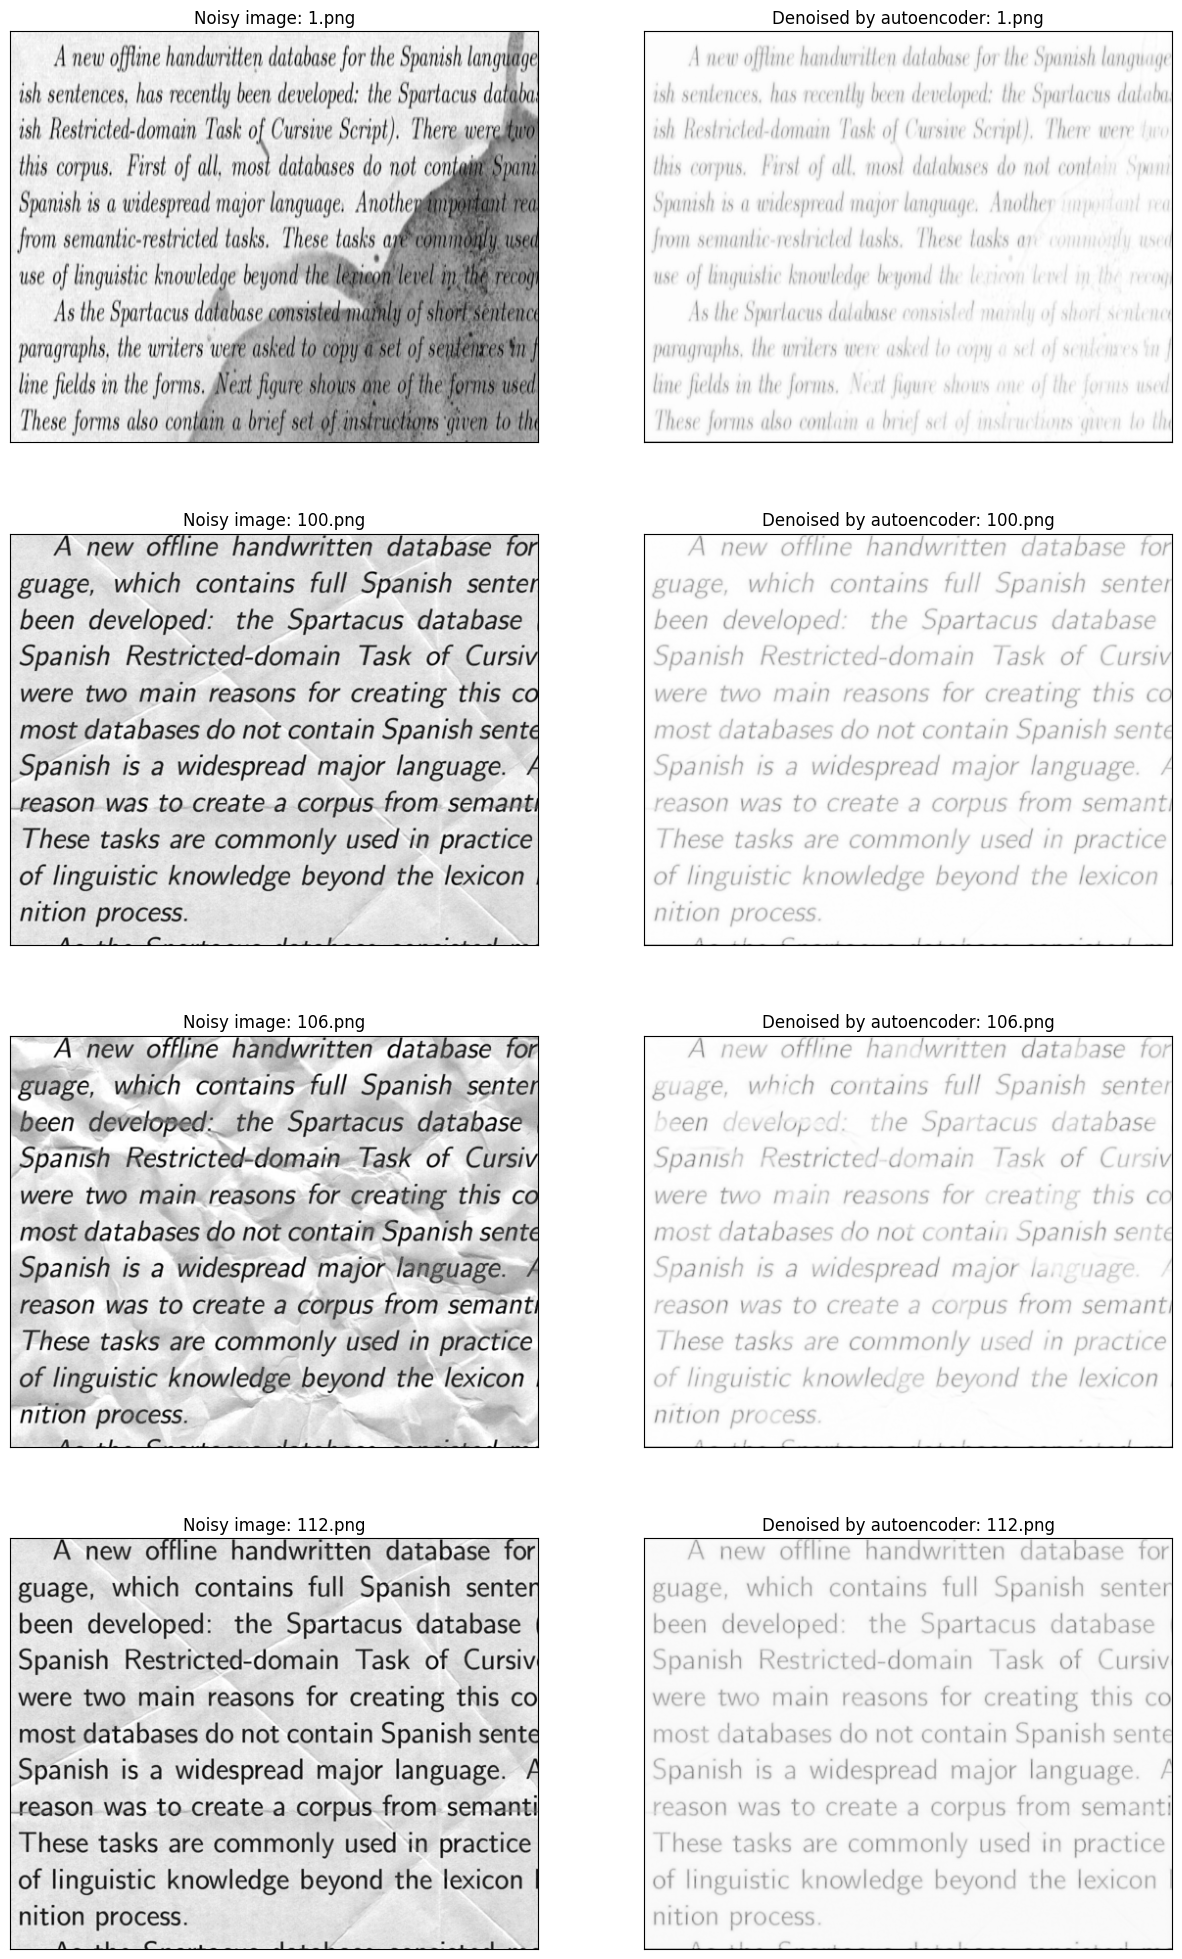

In [21]:
plt.figure(figsize=(15,25))
for i in range(0,8,2):
    plt.subplot(4,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i][:,:,0], cmap='gray')
    plt.title('Noisy image: {}'.format(test_img[i]))

    plt.subplot(4,2,i+2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(Y_test[i][:,:,0], cmap='gray')
    plt.title('Denoised by autoencoder: {}'.format(test_img[i]))

plt.show()